In [93]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

In [94]:
data= pd.read_pickle(r"E:\extra\data_science\project\dtm.pkl")

data=data.transpose()
data.head()

,vir,chris,burnham,larry,craig,kevin,sam,bill,john,ronny
aah,0,0,0,1,9,3,0,1,0,0
aarp,0,0,0,0,2,0,0,0,0,0
abducted,1,0,0,0,0,0,0,0,0,0
abduction,0,0,0,0,0,0,1,0,0,0
ability,1,0,0,0,0,0,0,0,0,0


In [95]:
data['vir'].max()

76

In [96]:
data[data['vir']==data['vir'].max()]

,vir,chris,burnham,larry,craig,kevin,sam,bill,john,ronny
like,76,151,50,95,218,66,155,13,15,134


In [97]:
top_dict={}
for c in data.columns:
    top=data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index,top.values))

In [98]:
top_dict['vir']

[('like', 76),
 ('just', 63),
 ('know', 54),
 ('shit', 44),
 ('dont', 39),
 ('im', 39),
 ('thats', 36),
 ('think', 31),
 ('right', 28),
 ('guys', 25),
 ('yeah', 24),
 ('youre', 24),
 ('did', 24),
 ('indian', 24),
 ('world', 22),
 ('years', 22),
 ('got', 21),
 ('beautiful', 20),
 ('people', 20),
 ('beef', 19),
 ('india', 18),
 ('day', 18),
 ('fuck', 17),
 ('time', 17),
 ('believe', 17),
 ('man', 17),
 ('god', 16),
 ('big', 16),
 ('went', 16),
 ('good', 16)]

In [99]:
words=[]
for comedian in data.columns:
    top=[w for w,c in top_dict[comedian]]
    words.extend(top)

In [100]:
from collections import Counter
add_stop_words=[word for word,count in Counter(words).items() if count>2]

In [101]:
clean_data= pd.read_pickle(r"E:\extra\data_science\project\clean.pkl")
clean_data.head()

,transcript
vir,i lost of my mind its very freeing you should...
chris,were you at the uh white house party yes i w...
burnham,exploring mental health decline over the cons...
larry,ladies and gentlemen larry the cable guy all...
craig,watch the full show for free on youtube ♪ ♪ ...


In [102]:
stop_words= text.ENGLISH_STOP_WORDS.union(add_stop_words)
cv= CountVectorizer(stop_words=stop_words)
data_cv=cv.fit_transform(clean_data['transcript'])
data_no_stop=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_no_stop.index=clean_data.index
data_no_stop

,aah,aarp,abducted,abduction,ability,abki,able,abortion,abortions,abroad,...,zone,zones,zoom,zoomers,zucker,zuckerberg,zuckerfuck,zuckerfucker,zuckermother,zumba
vir,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chris,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,1,1,1,2,0
burnham,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
larry,1,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
craig,9,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kevin,3,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
sam,0,0,0,1,0,0,0,6,1,1,...,0,0,0,0,0,0,0,0,0,1
bill,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ronny,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


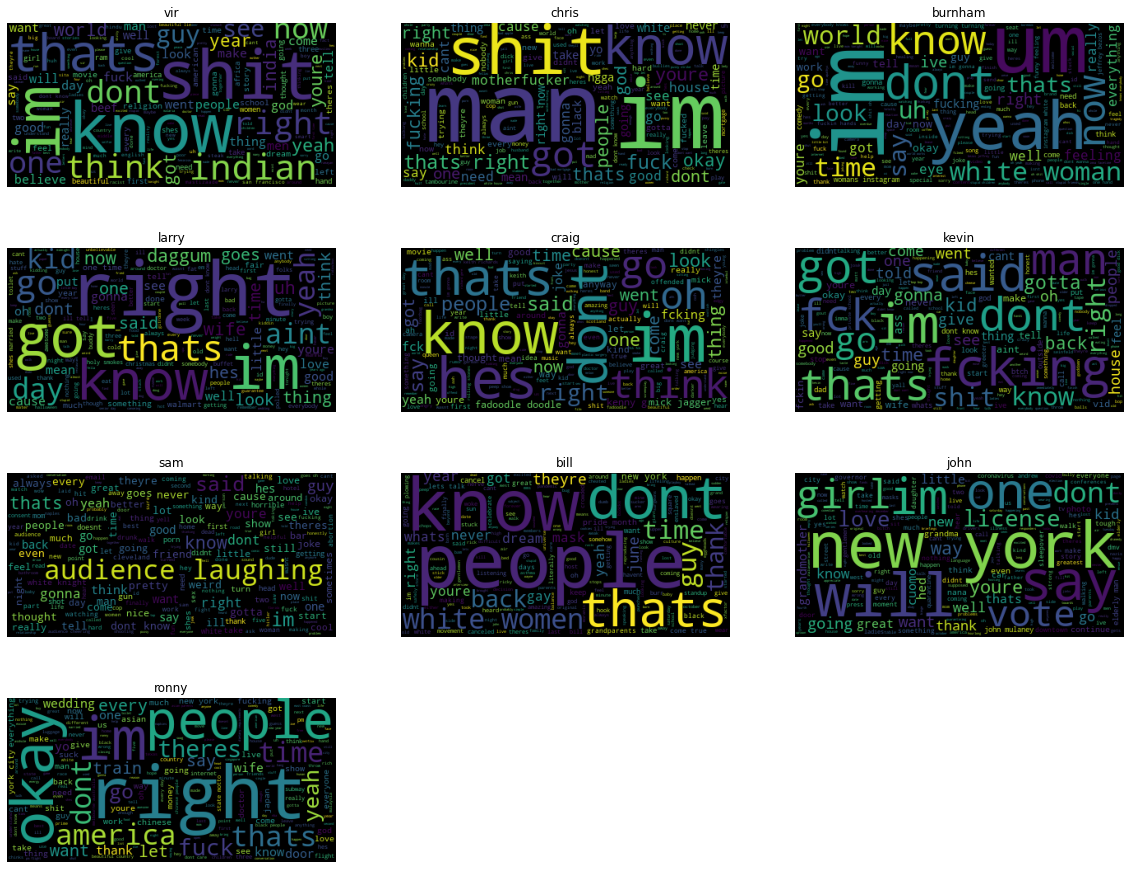

In [103]:

wc= WordCloud()
plt.rcParams['figure.figsize']=[20,20]
for index,comedian in enumerate(data.columns):
    wc.generate(clean_data.transcript[comedian])
    plt.subplot(5,3,index+1)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(comedian)
plt.show()

In [104]:
unique_list=[]
for comedian in data.columns:
    unique_list.append(data[comedian].to_numpy().nonzero()[0].size)

In [105]:
unique_list

[1390, 1473, 1248, 1587, 1366, 1330, 1349, 295, 379, 1368]

In [106]:
data_words=pd.DataFrame({'comedian':data.columns,'unique_words':unique_list})
data_words

,comedian,unique_words
0,vir,1390
1,chris,1473
2,burnham,1248
3,larry,1587
4,craig,1366
5,kevin,1330
6,sam,1349
7,bill,295
8,john,379
9,ronny,1368


In [107]:
data_unique=data_words.sort_values(by='unique_words')

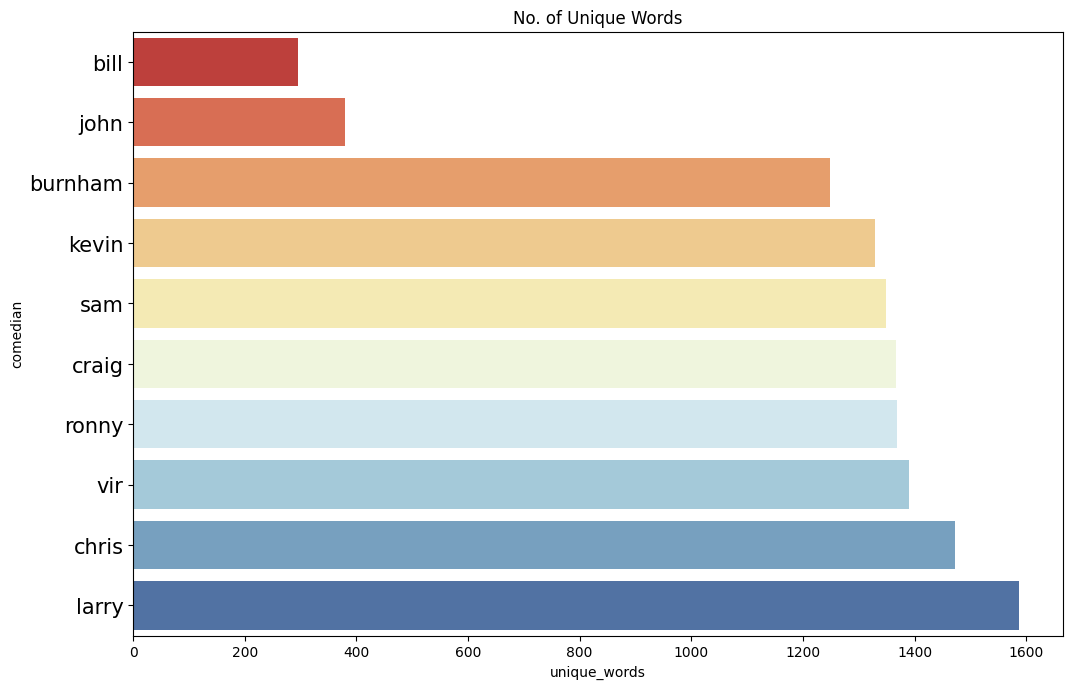

In [108]:

f, ax = plt.subplots(figsize=(12,8),dpi=100)
sns.color_palette("husl", 10)
chart = sns.barplot(x="unique_words", y="comedian",  data=data_unique, orient='h',
           palette='RdYlBu')
plt.title('No. of Unique Words')
chart.figure.savefig("chart.png")
# chart

In [109]:
data_bad_words= data.transpose()[['shit','fuck','fucking']]
data_bad_words['f_word']=data_bad_words['fuck']+data_bad_words['fucking']
data_bad_words['s_word']=data_bad_words['shit']
data_bad_words.drop(['shit','fuck','fucking'],axis=1,inplace=True)

In [110]:
data_bad_words

,f_word,s_word
vir,24,44
chris,108,83
burnham,32,26
larry,0,1
craig,0,16
kevin,0,46
sam,11,7
bill,0,0
john,0,0
ronny,51,17


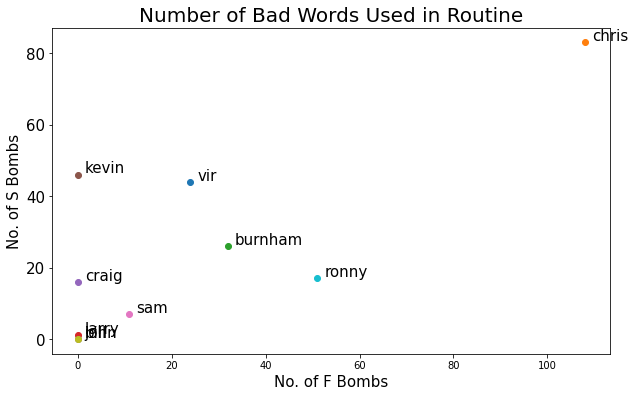

In [111]:
plt.rcParams['figure.figsize']=[10,6]
for i,comedian in enumerate(data_bad_words.index):
    x=data_bad_words['f_word'].loc[comedian]
    y=data_bad_words['s_word'].loc[comedian]
    plt.scatter(x,y)
    plt.text(x+1.5,y+0.5,comedian,fontsize=15)
plt.title('Number of Bad Words Used in Routine',fontsize=20)
plt.xlabel('No. of F Bombs',fontsize=15)
plt.ylabel('No. of S Bombs',fontsize=15)
plt.show()

In [112]:
datap= clean_data
datap.head()

,transcript
vir,i lost of my mind its very freeing you should...
chris,were you at the uh white house party yes i w...
burnham,exploring mental health decline over the cons...
larry,ladies and gentlemen larry the cable guy all...
craig,watch the full show for free on youtube ♪ ♪ ...


In [113]:
datap['polarity']= datap['transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)
datap['subjectivity']= datap['transcript'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [114]:
datap

,transcript,polarity,subjectivity
vir,i lost of my mind its very freeing you should...,0.097299,0.496523
chris,were you at the uh white house party yes i w...,0.013293,0.557982
burnham,exploring mental health decline over the cons...,0.016158,0.531346
larry,ladies and gentlemen larry the cable guy all...,0.063826,0.525841
craig,watch the full show for free on youtube ♪ ♪ ...,0.095517,0.562354
kevin,streaming on netflix from november yo wh...,0.107493,0.493118
sam,sam morril second onehour special i got this w...,0.063014,0.543122
bill,original air date october host bill burr doe...,0.095962,0.445379
john,original air date october john mulaney talks...,0.167803,0.535047
ronny,ladies and gentlemen ronny chieng thank ...,0.110573,0.471101


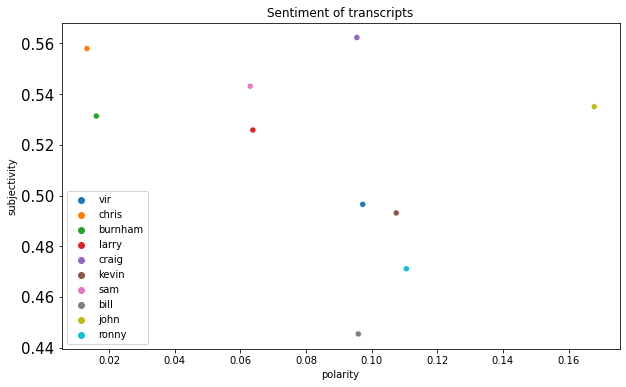

In [116]:
plt.rcParams['figure.figsize']=[10,6]
sns.scatterplot(data=datap, x="polarity", y="subjectivity", hue=datap.index)
plt.title('Sentiment of transcripts')
plt.show()